# Dijkstra's Shortest Path Algorithm

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

---
##### Summary
* Goal: Implement [Dijkstra's Shortest Path Algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
* Methods:
    - Use [`networkx` ](https://networkx.github.io/) for graph creation and as reference.
* Details:
    - Runs ~O(N^2), where N is the number of vertices in graph.

___

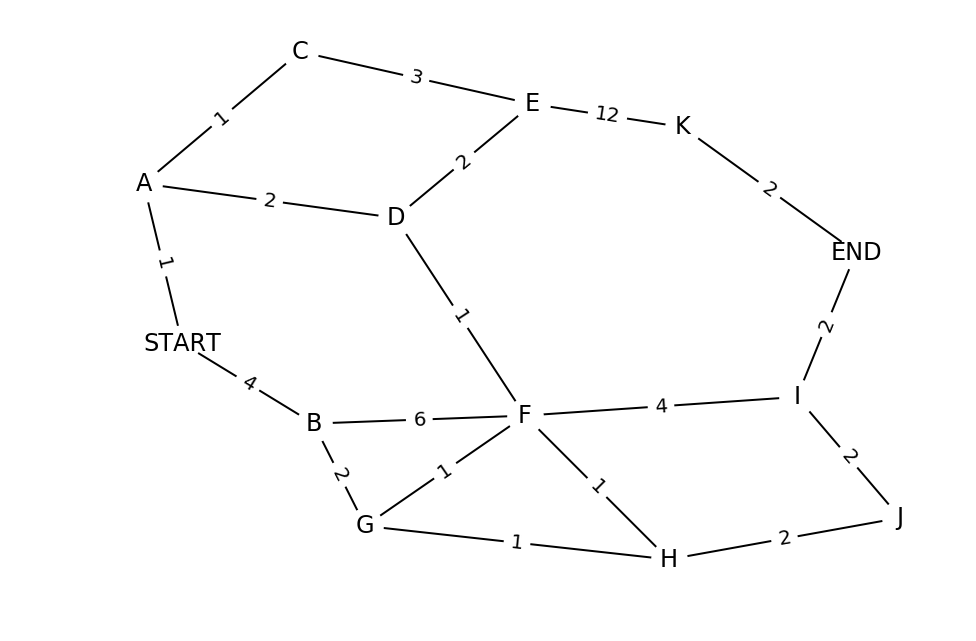

In [8]:
G = nx.Graph()

G.add_nodes_from(list('ABCDEFGHIJ') + ['START', 'END'])
G.add_edges_from([('START', 'A', {'weight':1}),\
                  ('START', 'B', {'weight':4}),\
                  ('A', 'C', {'weight':1}),\
                  ('A', 'D', {'weight':2}),\
                  ('C', 'E', {'weight':3}),\
                  ('D', 'E', {'weight':2}),\
                  ('E', 'K', {'weight':12}),\
                  ('K', 'END', {'weight':2}),\
                  ('D', 'F', {'weight':1}),\
                  ('B', 'F', {'weight':6}),\
                  ('B', 'G', {'weight':2}),\
                  ('G', 'F', {'weight':1}),\
                  ('G', 'H', {'weight':1}),\
                  ('F', 'H', {'weight':1}),\
                  ('F', 'I', {'weight':4}),\
                  ('H', 'J', {'weight':2}),\
                  ('J', 'I', {'weight':2}),\
                  ('I', 'END', {'weight':2})])

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='w')

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

In [9]:
nx.dijkstra_path(G, 'START', 'END')

['START', 'A', 'D', 'F', 'I', 'END']

Best path found ['START', 'A', 'D', 'F', 'I', 'END']
Proportion evaluated nodes 12 / 13 = 92.31%


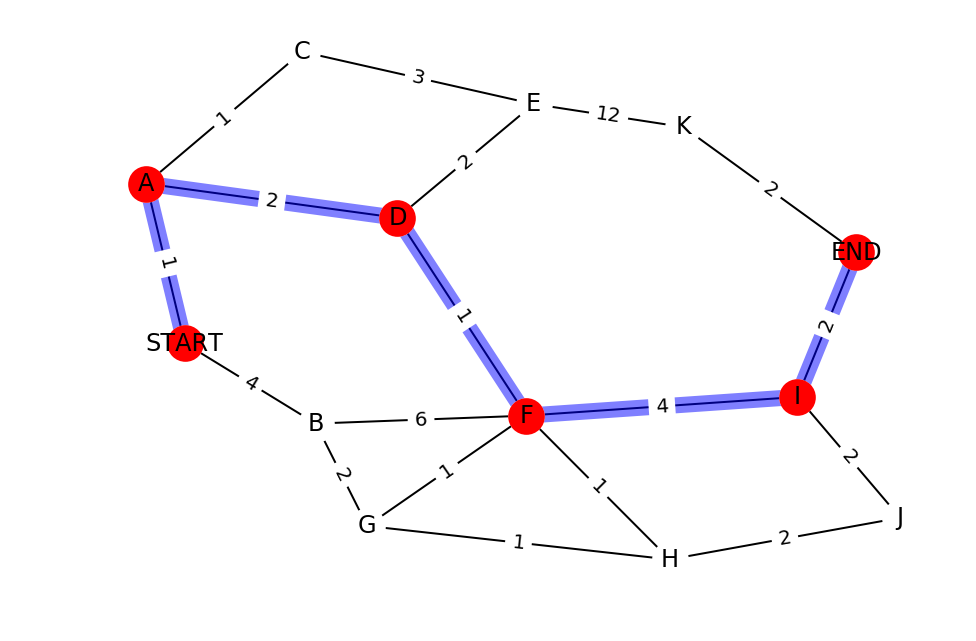

In [10]:
number_evaluated_nodes = 0

# init node potentials
for node in G.nodes:
    if node == 'START':
        G.node[node]['potential'] = 0
    else:
        G.node[node]['potential'] = +np.inf
    # create pointer to keep track of path
    G.node[node]['from'] = None

# keep track of unvisited nodes
unvisited = list(G.nodes) 
# collect each node's neighbours, weights, and potential
node_objects = {node: {'neighbours': dict(G[node]), 'params': G.node[node]} for node in G.nodes} 
q = [[k, node_objects[k]['params']['potential']] for k in unvisited]
q = sorted(q, key= lambda k: k[1])

node_label = ''
while node_label != 'END':
    number_evaluated_nodes +=1
    # get node with the samllest potential
    node_label, node_potential = q[0] 
    unvisited.remove(node_label)
    neighbour = node_objects[node_label]['neighbours']
    for n in neighbour:
        if n in unvisited:
            neighbour_weight = neighbour[n]['weight']
            target = node_objects[n]['params']
            # only update if path has lower potential than target
            if (neighbour_weight+node_potential) < target['potential']: 
                target['potential'] = (neighbour_weight+node_potential)
                target['from'] = node_label # pointer to past node on path
    # update min-queue based on unvisited nodes ordered by potential
    q = [[k, node_objects[k]['params']['potential']] for k in unvisited]
    q = sorted(q, key= lambda k: k[1])

c = node_objects['END']['params']['from']
path = ''
while c != 'START':
    path+=c
    c = node_objects[c]['params']['from']

path = ['START'] + list(reversed(path)) + ['END']

print('Best path found', path)
print('Proportion evaluated nodes', number_evaluated_nodes, '/', len(G.nodes), '=', '{:.2f}%'.format(number_evaluated_nodes/len(G.nodes)*100))

#pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='w')

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);
nx.draw_networkx_edges(G, pos, edgelist=[(path[i],path[i+1]) for i in range(len(path)-1)],
                       width=8, alpha=0.5, edge_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r');